# Proyecto Integrador
Este proyecto esta basado en la información expuesta en la pagina de la policia nacional, item de delitos sexuales

### Importaciones

In [119]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# valiables de entorno
from config import * 

### Definir estilos para grafica

In [120]:
pd.set_option('display.max_rows', 10)
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= 'x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize= 'x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize= 'x-small')    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

### Connection a BD
Esta conexion a la base de datos no tiene ningun valor quemado de la base de datos, estos vienen de la importación de config que a su vez lee las variables de entorno establecidas (.env)

In [121]:
strConexion = f"mysql+mysqldb://{mySqlUser}:{mySqlPassword}@{mySqlHost}/{mySqlBd}"
engine = create_engine(strConexion)

### Consulta a BD (Cantidad de abusos por genero)

In [122]:
query = "call listar_generos_conteo();"
frame = pd.read_sql_query(query, engine)
frame

,genero,cant
0,FEMENINO,147231.0
1,MASCULINO,25562.0
2,NO APLICA,224.0
3,NO REPORTADO,2.0
4,NO RESPORTADO,91.0


### Grafico de abusos por genero

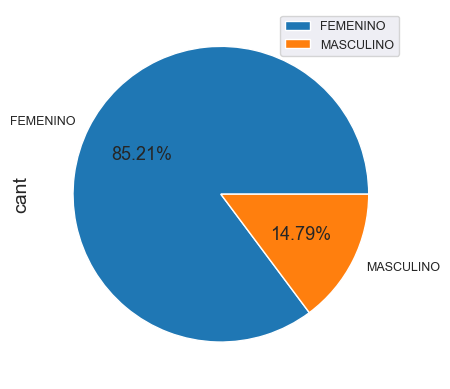

In [123]:
frame = frame[:2]
frame.plot.pie(y='cant', labels=frame['genero'], autopct='%1.2f%%')
plt.legend()
plt.show()


### Consulta BD (Conteo de abusados por arma usada y por año)

In [124]:
query = "call listar_armas_anio_conteo();"
frame = pd.read_sql_query(query, engine)
frame

,arma,anio,cant
0,ARMA BLANCA / CORTOPUNZANTE,2018,2653.0
1,ARMA BLANCA / CORTOPUNZANTE,2019,1827.0
2,ARMA BLANCA / CORTOPUNZANTE,2020,1798.0
3,ARMA BLANCA / CORTOPUNZANTE,2021,1574.0
4,ARMA BLANCA / CORTOPUNZANTE,2022,2844.0
...,...,...,...
35,SIN EMPLEO DE ARMAS,2018,11717.0
36,SIN EMPLEO DE ARMAS,2019,28903.0
37,SIN EMPLEO DE ARMAS,2020,13448.0
38,SIN EMPLEO DE ARMAS,2021,26396.0


### Grafico uso de armas por año

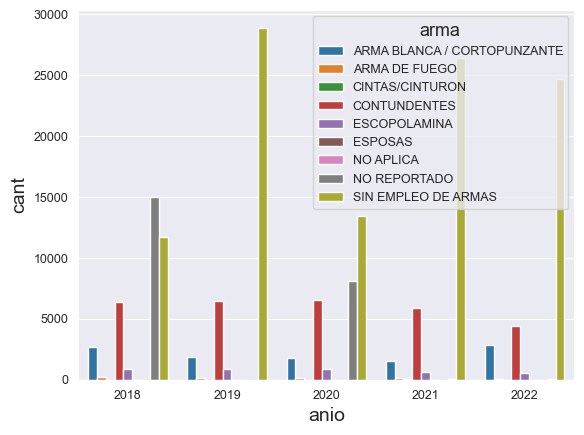

In [125]:
sns.barplot(x=frame['anio'], y=frame["cant"],  hue=frame['arma'])
plt.show()

### Consulta a BD (ciudades, años, cantidad de abusos)

In [126]:
query = "call listar_ciudades_anio_conteo();"
frame = pd.read_sql_query(query, engine)
frame

,municipio,anio,conteo
0,BOGOTÁ D.C. (CT),2022,7489.0
1,BOGOTÁ D.C. (CT),2019,6311.0
2,BOGOTÁ D.C. (CT),2021,6206.0
3,BOGOTÁ D.C. (CT),2018,5279.0
4,BOGOTÁ D.C. (CT),2020,5102.0
...,...,...,...
4861,ÚTICA,2022,1.0
4862,VIJES,2022,1.0
4863,VILLAHERMOSA,2022,1.0
4864,VIRACACHÁ,2022,1.0


### Grafico cantidad de abusos por año y por ciudad

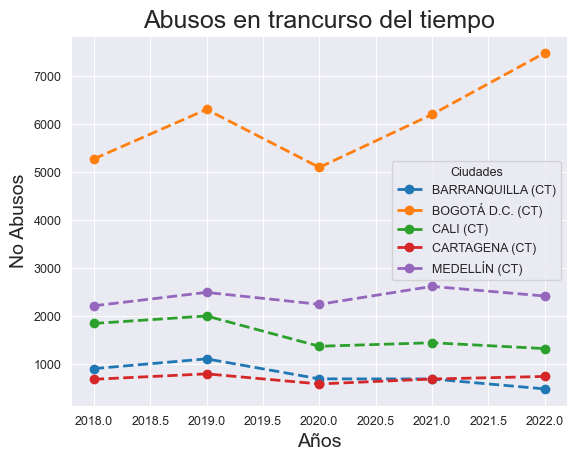

In [127]:
# agrega headerss
lineplot =pd.concat([frame])[['municipio', 'anio', 'conteo']]
# Filtrado ciudades unicas
citys = [fila[0] for fila in frame.values.tolist()]
list_citys = []
for element in citys:
    if( element not in list_citys):
      list_citys.append(element)

#top 5 ciudades
list_citys = list_citys[:5]

# preparacion para listar
lineplot = lineplot[lineplot['municipio'].isin(list_citys)]
lineplot = lineplot.pivot(index='municipio', columns='anio' ,values='conteo').T

# extraccion de columnas para label
labels = lineplot.columns

lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('anio')

# # plotting
plt.plot(lineplot, 'o--', linewidth=2)
#customization
# plt.xticks([2018, 2019, 2020, 2021, 2022, 2023])
plt.xlabel('Años')
plt.ylabel('No Abusos')
plt.title('Abusos en trancurso del tiempo')
plt.legend(title='Ciudades', title_fontsize = 'x-small',  fontsize= 'x-small', labels=labels)
plt.show()



### Consulta a BD (cantidad abusos a lo largo del tiempo)

In [128]:

query = "call listar_anio_conteo();"    
frame = pd.read_sql_query(query, engine)
frame

,anio,conteo
0,2019.1,11643.0
1,2018.1,11503.0
2,2020.1,10995.0
3,2021.1,10860.0
4,2022.1,8772.0
...,...,...
40,2020.7,2619.0
41,2020.8,2485.0
42,2020.5,2263.0
43,2020.6,2240.0


### Grafica Dispersion de abusos por año

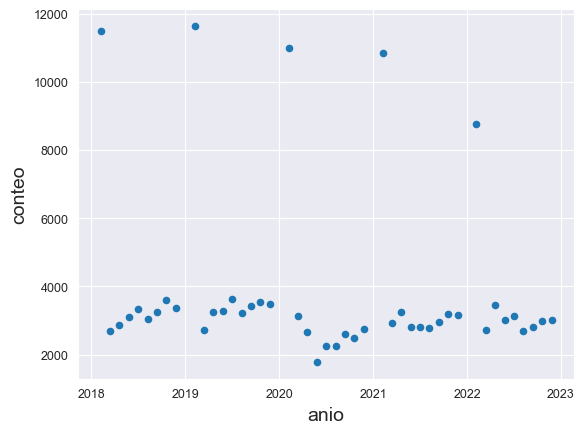

In [129]:
p = frame[['anio', 'conteo']]
p.plot.scatter(x='anio',y='conteo')
plt.show()